In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
import os
from plotting_fxns import *
%load_ext autoreload
%autoreload 2

In [ ]:
# EXTRACTION OF SNOW DEPTHS
# df_out = pd.read_csv('../Data/cores/wolverine/wolverineEC_snowdepth.csv', index_col=0)
# for fn in os.listdir('../Data/cores/wolverine/raw/'):
#     if 'snowdepth' not in fn and 'csv' in fn:
#         df = pd.read_csv('../Data/cores/wolverine/raw/' + fn, index_col=0)
#         snow_depth = df.loc[~np.isnan(df['annual_layer_depth']), 'annual_layer_depth'].values[0] / 100
#         if snow_depth == 0:
#             snow_depth = df.loc[~np.isnan(df['annual_layer_depth']), 'annual_layer_depth'].values[1] / 100
#         date = fn.split('_')[-1].split('.csv')[0].replace('.','_')
#         df_out.loc[date] = snow_depth
# df_out.to_csv('../Data/cores/wolverine/wolverineEC_snowdepth.csv')

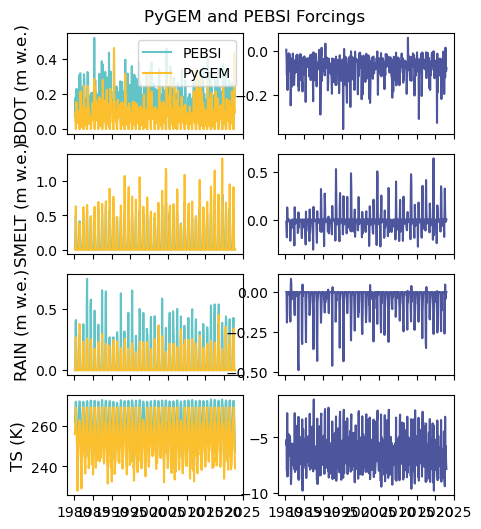

In [3]:
# Compare forcings
glacsite = 'gulkanaT'
forcings_pebsi = pd.read_csv(f'../Data/{glacsite}_1d_forcings.csv', index_col=0)
forcings_pygem = pd.read_csv(f'../Data/{glacsite}_pygem_forcings.csv', index_col=0)
forcings_pebsi.index = pd.to_datetime(forcings_pebsi.index)
forcings_pygem.index = pd.to_datetime(forcings_pygem.index)

# resample
pebsi_mb = forcings_pebsi[['BDOT','RAIN','SMELT','SUBLIM']].resample('MS').sum()
forcings_pebsi = forcings_pebsi[['TS']].resample('MS').mean()
forcings_pebsi[['BDOT','RAIN','SMELT','SUBLIM']] = pebsi_mb[['BDOT','RAIN','SMELT','SUBLIM']]

# select to same months
months_both = np.sort(list(set(forcings_pebsi.index) & set(forcings_pygem.index)))
# months_both = pd.date_range('1982-01-01','1983-01-01',freq='MS')
forcings_pebsi = forcings_pebsi.loc[months_both]
forcings_pygem = forcings_pygem.loc[months_both]

# compare
fig, axes = plt.subplots(len(forcings_pygem.columns), 2, figsize=(5, 6), sharex=True)
for v, var in enumerate(forcings_pygem.columns):
    ax = axes[v]
    divide = 1 if var == 'TS' else 1000
    ax[0].plot(forcings_pebsi.index, forcings_pebsi[var] / divide, c=colors[0], label='PEBSI')
    ax[0].plot(forcings_pygem.index, forcings_pygem[var] / divide, c=colors[1], label='PyGEM')
    ax[1].plot(forcings_pygem.index, (forcings_pygem[var] - forcings_pebsi[var]) / divide, c=colors[2], label='Diff')
    varlabel = var+' (m w.e.)' if var != 'TS' else var+' (K)'
    ax[0].set_ylabel(varlabel, fontsize=12)
    
axes[0,0].legend()
# ax.set_xticks(pd.date_range(forcings_pebsi.index[0], forcings_pebsi.index[-1], freq='10YE'))
ax[0].xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
ax[1].xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
fig.suptitle('PyGEM and PEBSI Forcings', fontsize=12, y=0.92)
plt.show()

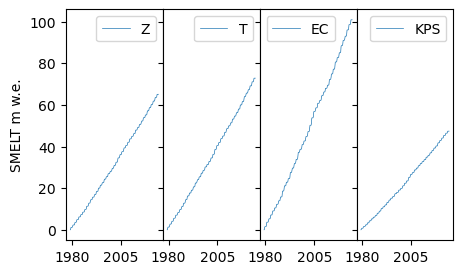

In [6]:
# Compare PEBSI forcings
var = 'SMELT'
fig, axes = plt.subplots(1,4, sharex=True,sharey=True, figsize=(5,3), gridspec_kw={'hspace':0, 'wspace':0})
for s,site in enumerate(['Z','T','EC','KPS']):
    ax = axes[s]
    glacier = 'kahiltna' if site == 'KPS' else 'wolverine' if site == 'EC' else 'gulkana'
    forcings = pd.read_csv(f'../Data/{glacier}{site}_1d_forcings.csv', index_col=0)
    forcings.index = pd.to_datetime(forcings.index)
    ax.plot(forcings.index, forcings[var].cumsum() / 1000, label=site,linewidth=0.5)
    ax.legend()
    ax.set_xticks(pd.date_range(forcings.index[0], forcings.index[-1], freq='25YE'))
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
    # ax.axhline(273.15, color='red',linewidth=0.5)
axes[0].set_ylabel(var+' m w.e.')
plt.show()



In [ ]:
# GULKANA CORES
# Process Excel sheet into .csv files
# for site in ['T','Z']:
    # # CORES
    # df_in = pd.read_excel('../Data/cores/Gulkana_Balance_2025.xlsx', sheet_name=f'20250420_FirnCore_{site}',skiprows=9)
    # df = df_in[['SBD','Length 1','Density']].iloc[1:]
    # df = df.loc[df['Length 1'] != '—']
    # df = df.astype(float)
    # df['Density'] *= 1000
    # df[['SBD', 'Length 1']] /= 100
    # df = df.rename(columns={'Length 1':'length','Density':'density'})
    # df =df.dropna()
    # df = df.set_index('SBD')
    # df.to_csv(f'../Data/gulkana{site}_2025.csv')

    # # PITS
    # nan = np.nan
    # date_dict = {
    #     2021: {'spring':{'T': nan, 'Z':nan}, 
    #             'fall':{'T':'2021.08.22_SiteT_Pit','Z':nan}},
    #     2022: {'spring':{'T':'2022.04.19_PitCore_T', 'Z':nan},
    #             'fall':{'T':'2022.08.22_PitCore_T','Z':'2022.08.22_PitCore_Z'}},
    #     2023: {'spring':{'T': nan, 'Z':nan}, 
    #             'fall':{'T':'20230823_Pit_T','Z':nan}},
    #     2024: {'spring':{'T':'20240419_PitCore_T','Z':'20240419_PitCore_Z'},
    #             'fall':{'T':'20240820_Pit_T','Z':'20240820_Pit_Z'}},
    #     2025: {'spring':{'T':'20250420_FirnCore_T','Z':'20250420_FirnCore_Z'},
    #             'fall':{'T':nan, 'Z':nan}}
    #           }
    # for year in [2021, 2022, 2023, 2024, 2025]:
    #     for season in ['spring','fall']:
    #         sheet_name = date_dict[year][season][site]
    #         if sheet_name is not nan:
    #             df_in = pd.read_excel(f'../Data/cores/gulkana/Gulkana_Balance_{year}.xlsx', sheet_name=sheet_name,skiprows=9)
    #             if 'Core' in sheet_name:
    #                 cols = ['SBD','Length 1','Density']
    #             else:
    #                 cols = ['SBD','Density']
    #             df = df_in[cols].iloc[1:]
    #             if year == 2022 and season == 'fall':
    #                 df = df.iloc[1:]

    #             # deal with some funnies
    #             df = df.loc[df['SBD'] > 0]
    #             if 'Length 1' in df.columns:
    #                 df.loc[df['Length 1'] == '—', 'Length 1'] = np.nan
    #                 df['Length 1'] = df['Length 1'].astype(float).fillna(10)
    #             else:
    #                 df['Length 1'] = np.ones(len(df.index)) * 10
    #             df = df.astype(float)

    #             # convert units
    #             df['Density'] *= 1000
    #             df[['Length 1','SBD']] /= 100

    #             # rename
    #             df = df.rename(columns={'Density':'density', 'Length 1':'length'})
    #             df = df.set_index('SBD')
                
    #             # save
    #             date = sheet_name.split('_')[0].replace('.','/')
    #             date = pd.to_datetime(date).strftime('%Y_%m_%d')
    #             df.to_csv(f'../Data/cores/gulkana/gulkana{site}_{date}.csv')

In [ ]:
# # WOLVERINE CORES
# # Process .csv files
# fp = '../Data/cores/wolverine/raw/'
# all_wolverine_dates = []
# for f in os.listdir(fp):
#     if 'WOLVERINE_EC' in f:
#         date = f.split('_')[-1].split('.csv')[0].replace('.','_')
#         all_wolverine_dates.append(date)
#         df_in = pd.read_csv(fp + f)
#         df = df_in[['SBD','length','layer_density']]
#         df = df.astype(float)
#         df['layer_density'] *= 1000
#         df[['SBD', 'length']] /= 100
#         df = df.rename(columns={'layer_density':'density'})
#         df = df.set_index('SBD')
#         df[df['density'] > 1000] = np.nan
#         df = df.dropna()
#         df.to_csv(f'../Data/cores/wolverine/wolverineEC_{date}.csv')

In [ ]:
# NEWEST WOLVERINE DATA
# Process Excel sheet into .csv files
# for site in ['EC']:
#     # CORES
#     nan = np.nan
#     date_dict = {
#         2023: {'spring':'20230506_FirnCoreEC', 'fall':'20230906_FirnCoreEC'},
#         2024: {'spring':'SiteEC_FirnCore_20240426','fall':nan},
#         2025: {'spring':'SiteEC_FirnCore_20250509','fall':nan}
#               }
#     for year in [2023, 2024, 2025]:
#         for season in ['spring','fall']:
#             sheet_name = date_dict[year][season]
#             if sheet_name is not nan:
#                 df_in = pd.read_excel(f'../Data/cores/wolverine/raw/Wolverine_Mass_Balance_{year}.xlsx', sheet_name=sheet_name,skiprows=9)
#                 if 'Core' in sheet_name:
#                     cols = ['SBD','Length 1','Density']
#                 else:
#                     cols = ['SBD','Density']
#                 df = df_in[cols].iloc[1:]
#                 if year == 2022 and season == 'fall':
#                     df = df.iloc[1:]

#                 # deal with some funnies
#                 df = df.loc[df['SBD'] > 0]
#                 if 'Length 1' in df.columns:
#                     df.loc[df['Length 1'] == '—', 'Length 1'] = np.nan
#                     df['Length 1'] = df['Length 1'].astype(float).fillna(10)
#                 else:
#                     df['Length 1'] = np.ones(len(df.index)) * 10
#                 df = df.astype(float)

#                 # convert units
#                 df['Density'] *= 1000
#                 df[['Length 1','SBD']] /= 100

#                 # rename
#                 df = df.rename(columns={'Density':'density', 'Length 1':'length'})
#                 df = df.set_index('SBD')
                
#                 # save
#                 date = sheet_name.split('_')[0].replace('.','/')
#                 if year > 2023:
#                     date = sheet_name.split('_')[-1]
#                 date = pd.to_datetime(date).strftime('%Y_%m_%d')
#                 df.to_csv(f'../Data/cores/wolverine/wolverine{site}_{date}.csv')

In [12]:
# KAHILTNA CORES
# Process Excel sheet into .csv files
for site in ['KPS']:
    # CORES
    nan = np.nan
    date_dict = {
        2024: {'spring':'FirnCore_KPS_20240526','fall':'FirnCore_KPSL_20240930'},
        2025: {'spring':'FirnCore_KPSL_20250523','fall':nan}
              }
    for year in [2024, 2025]:
        for season in ['spring','fall']:
            sheet_name = date_dict[year][season]
            if sheet_name is not nan:
                df_in = pd.read_excel(f'../Data/cores/kahiltna/{year}_Kahiltna_Mass_Balance.xlsx', sheet_name=sheet_name,skiprows=9)
                if 'Core' in sheet_name:
                    cols = ['SBD','Length 1','Density']
                else:
                    cols = ['SBD','Density']
                df = df_in[cols].iloc[1:]
                if year == 2022 and season == 'fall':
                    df = df.iloc[1:]

                # deal with some funnies
                df = df.loc[df['SBD'] > 0]
                if 'Length 1' in df.columns:
                    df.loc[df['Length 1'] == '—', 'Length 1'] = np.nan
                    df['Length 1'] = df['Length 1'].astype(float).fillna(10)
                else:
                    df['Length 1'] = np.ones(len(df.index)) * 10
                df = df.astype(float)

                # convert units
                df['Density'] *= 1000
                df[['Length 1','SBD']] /= 100

                # rename
                df = df.rename(columns={'Density':'density', 'Length 1':'length'})
                df = df.set_index('SBD')
                
                # save
                date = sheet_name.split('_')[-1].replace('.','/')
                date = pd.to_datetime(date).strftime('%Y_%m_%d')
                df.to_csv(f'../Data/cores/kahiltna/kahiltna{site}_{date}.csv')

### Surface Density

In [ ]:
# Calculate average top 50cm density
for spring_only in [True, False]:
    for site in ['T','Z','EC']: # 
        glacier = 'wolverine' if site == 'EC' else 'gulkana'
        all_top50 = []
        for file in os.listdir(f'../Data/cores/{glacier}/'):
            # use_condition is True if it is a spring file or if spring_only is False (use all measurements)
            use_condition = ('_05_' in file) or ('_04_' in file) if spring_only else True
            if use_condition and site in file:
                df = pd.read_csv(f'../Data/cores/{glacier}/' + file)
                density_50 = df.loc[df['SBD'] <= 0.5, 'density'].values

                # skip files without measurements before 50 cm
                if len(density_50) < 1:
                    continue
                all_top50.append(np.mean(density_50))
        if spring_only:
            print(site, f'mean density 0-50cm only including spring measurements: {np.mean(all_top50):.2f} kg m-3')
        else:
            print(site, f'mean density 0-50cm including all measurements: {np.mean(all_top50):.2f} kg m-3')
    print()

In [ ]:
density_50 = []
site = 'EC'
glacier = 'gulkana' if site in ['Z','T'] else 'wolverine'
fp = f'../../Model/MB_data/Point/{glacier}/pitcore/'
for fn in os.listdir(fp):
    year = fn.split(glacier.capitalize())[-1][1:5]
    month = fn.split(year)[-1][1:3]
    if site in fn and month in ['04','05']:
        df = pd.read_csv(fp + fn)
        df = df[np.isnan(df['avg_core_length'])]
        df['density'] = df['sample_weight'] / df['volume'] * 1000
        print(month, year,'Mean density:', np.mean(df[df['sample_bottom_depth'] <= 50.0]['density']))

In [5]:
# Calculate surface density from line of fit
depth = 1 # top depth to consider in m
plot_srho = False
if plot_srho:
    fig, axes = plt.subplots(4, 1, figsize=(5, 10))
for s,site in enumerate(['T','Z','EC','KPS']): # 
    glacier = 'wolverine' if site == 'EC' else 'kahiltna' if site == 'KPS' else 'gulkana'
    all_top_fit = []
    if plot_srho:
        ax = axes[s]
    i = 0
    for file in os.listdir(f'../Data/cores/{glacier}/'):
        use_condition = ('_05_' in file) or ('_04_' in file)
        if use_condition and site in file:
            df = pd.read_csv(f'../Data/cores/{glacier}/' + file)
            x_all = df['SBD'].values
            y_all = df['density'].values
            
            # density and depth
            x = df.loc[df['SBD'] >= depth, 'SBD'].values
            y = df.loc[df['SBD'] >= depth, 'density'].values
            # x = df.loc[df['density'] >= 300, 'SBD'].values
            # y = df.loc[df['density'] >= 300, 'density'].values

            # fit a line
            x_mean = np.nanmean(x)
            y_mean = np.nanmean(y)
            if np.all( x == x[0]):
                continue
            m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
            b = y_mean - m * x_mean
            all_top_fit.append(b)

            # plot
            if plot_srho:
                ax.scatter(y_all, x_all, color=colors[i], facecolor='none')
                ax.scatter(y, x, color=colors[i], label=file.split(site)[-1][1:-4])
                x = np.append([0], x)
                ax.plot(x * m + b, x, color=colors[i])
                i += 1
            
                ax.invert_yaxis()
                ax.set_xlim(100, 850)
                ax.legend()
                ax.axhline(0, color='k', linewidth=0.5)
                ax.set_title(site)
    print(site, np.mean(all_top_fit))

T 347.12680741215826
Z 366.0704650186136
EC 427.1374796141425
KPS 417.6762246562446


In [ ]:
# Calculate surface density from line of fit using change in slope cutoff
for site in ['T','Z','EC']: # 'T','Z','EC'
    fig, (ax, ax1) = plt.subplots(1,2)
    glacier = 'wolverine' if site == 'EC' else 'gulkana'
    all_top_fit = []
    i=0
    for file in os.listdir(f'../Data/cores/{glacier}/'):
        use_condition = ('_05_' in file) or ('_04_' in file)
        if use_condition and site in file:
            df = pd.read_csv(f'../Data/cores/{glacier}/' + file)
            x = df['SBD'].values
            y = df['density'].values
            x_all = df['SBD'].values
            y_all = df['density'].values
            
            # density and depth
            ax1.plot(np.diff(y) / np.diff(x), x[:-1], color=colors[i])
            where = np.where(np.diff(y) / np.diff(x) > 100)[0]
            where_2m = np.where(x[where] < 2)[0][-1]
            x = x[where_2m+2:]
            y = y[where_2m+2:]
            
            # fit a line
            x_mean = np.nanmean(x)
            y_mean = np.nanmean(y)
            m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
            b = y_mean - m * x_mean
            all_top_fit.append(b)
            ax.scatter(y, x, color=colors[i])
            ax.scatter(y_all, x_all, color=colors[i], facecolors='none')
            x = np.append([0], x)
            ax.plot(x*m+b, x, color=colors[i])
            i+= 1
    ax.invert_yaxis()
    ax1.invert_yaxis()
    ax.set_ylim(5, -0.2)
    ax1.set_ylim(5, -0.2)
    ax1.set_xlim(-400, 400)
    ax.set_xlim(100, 700)
    ax.axhline(0, color='k', linewidth=0.5)
    plt.show()
    print(site, np.mean(all_top_fit))

### CFM inputs from PyGEM

In [15]:
glac_no_dict = {'gulkana':'1.00570', 'wolverine':'1.09162', 'kahiltna':'1.22193'}
site_dict = {'gulkana':['Z','T'], 'wolverine':['EC'], 'kahiltna':['KPS']}
elev_dict = {'Z':2081, 'T':1877, 'EC':1348, 'KPS':3053}
latlon_dict = {'gulkana':[63.288623,-145.482731], 'wolverine':[60.412, -148.908], 'kahiltna':[62.833, -151.229]}
for glacier in ['gulkana','wolverine','kahiltna']:
    glac_no = glac_no_dict[glacier]
    # ds = xr.open_dataset(f'../Data/pygem/{glac_no}_ERA5_MCMC_ba0_1sets_1980_2022_all.nc').isel(glac=0)
    # months = ds['time'].values
    # ds['year_from_month'] = ds['time'].dt.year
    # ds['glac_area_monthly'] = ds['glac_area_annual'].sel(year=ds['year_from_month'])
    # ds = ds.drop_vars('year_from_month')
    # brainfall = ds['glac_prec_monthly'] / ds['glac_area_monthly'] * 1000
    # ds.close()
    # plt.plot(np.array(ds.time.values, dtype='datetime64[D]'), rainfall)

    # surface temperature from MERRA-2
    ts = xr.open_dataset('E:/monthly/all_monthly_data.nc')['TPSNOW']
    gp = xr.open_dataset('E:/MERRA-2/MERRA2constants.nc4')
    lat, lon = latlon_dict[glacier]
    ts = ts.sel(lat = lat, lon = lon, method='nearest')
    elev_merra = gp.sel(lat=lat, lon=lon, method='nearest')['PHIS'].values[0] / 9.81
    ts['time'] = xr.DataArray(pd.to_datetime(ts.time.values).normalize(), dims='time')

    ds = xr.open_dataset(f'../Data/pygem/{glac_no}_ERA5_MCMC_ba0_1sets_1980_2022_binned.nc').isel(glac=0)
    months = ds['time'].values
    # get site-specific vars
    for site in site_dict[glacier]:
        ts = ts.sel(time=np.array(months, dtype='datetime64[D]'))
        ts += 0.0065 * (elev_merra - elev_dict[site])
        ts = ts.fillna(273.15)

        bin_no = np.argmin(np.abs(ds['bin_surface_h_initial'].values - elev_dict[site]))
        accum = ds['bin_accumulation_monthly'].sel(bin=bin_no)* 1000
        melt = ds['bin_melt_monthly'].sel(bin=bin_no) * 1000
        rainfall = ds['bin_prec_monthly'].sel(bin=bin_no) * 1000

        df_out = pd.DataFrame({'BDOT':accum.values, 'SMELT':melt.values, 
                               'RAIN':rainfall.values, 'TS':ts.values},
                              index = ds.indexes['time'].to_datetimeindex())
        df_out.to_csv(f'../Data/{glacier}{site}_pygem_forcings.csv')
        ds.close()

C:\Users\cvw30\AppData\Local\Temp\ipykernel_23036\3312681341.py:39: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  index = ds.indexes['time'].to_datetimeindex())
C:\Users\cvw30\AppData\Local\Temp\ipykernel_23036\3312681341.py:39: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  index = ds.indexes['time'].to_datetimeindex())
C:\Users\cvw30\AppData\Local\Temp\ipykernel_23036\3312681341.py:39: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenc